## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 10.0)
warnings.filterwarnings("ignore")

df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [16]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [14]:
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FCFDF48>,
      dtype=object)

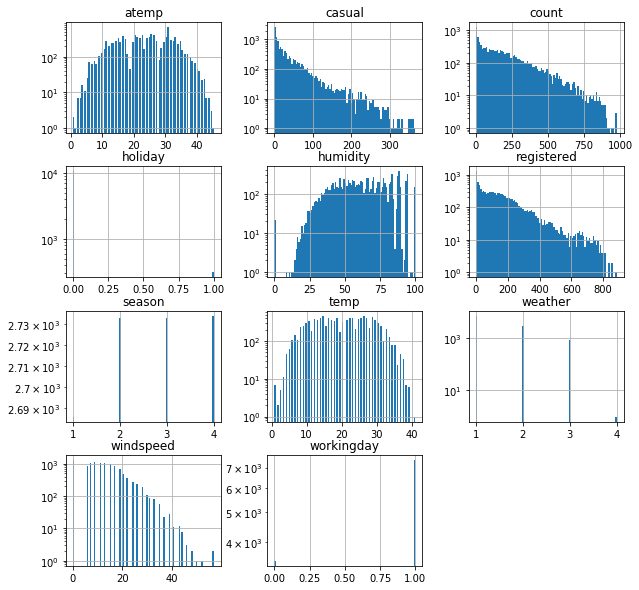

In [15]:
df.hist(bins=100, log=True)

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [29]:
#     sns.distplot(df[column])

base_metrics = ['temp','atemp','humidity','windspeed','casual','registered']
print("Базовые метрики")
print(df[base_metrics].describe())
print("------------------------------------")

print("Самые популярные значения метрики, топ 5")
for i in base_metrics:
    print(df[i].value_counts().nlargest(5))
    print("------------------------------------")



Базовые метрики
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered  
count  10886.000000  
mean     155.552177  
std      151.039033  
min        0.000000  
25%       36.000000  
50%      118.000000  
75%      222.000000  
max      886.000000  
------------------------------------
Самые популярные значения метрики, топ 5
14.76

Для каждой метрики возможны свои аномалии. У двух колонок температур,
аномалии скорее всего находятся в пределах от 0-7 и от 35-45.
Для влажности аномалии находяться в пределах от 0 - 20.
Для windspeed аномалии находятся в верхних границах от 30 до 56.
Для casual как то непонятно что это?) поэтому не могу точно сказать. 
Eсли смотреть на график, то все значения кажутся нормальными. 
Кроме тех, что за 300.
А если смотреть на квантили, то все значения выше 150, уже кажутся странными.
Для registered аналогичная ситуация.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [30]:
for i in df:
    print(f"Эксцесс для {i} ", kurtosis(df[i]))
    print(f"Ассиметрия для {i}", skew(df[i]))
    print('--------------------')



Эксцесс для season  -1.3555899543299803
Ассиметрия для season -0.007074695296526289
--------------------
Эксцесс для holiday  30.032624417535125
Ассиметрия для holiday 5.6597371332540805
--------------------
Эксцесс для workingday  -1.3977369782030475
Ассиметрия для workingday -0.7760560687198784
--------------------
Эксцесс для weather  0.39480007841067577
Ассиметрия для weather 1.2433126730817885
--------------------
Эксцесс для temp  -0.9146613849825282
Ассиметрия для temp 0.0036903358354289715
--------------------
Эксцесс для atemp  -0.8502363689497141
Ассиметрия для atemp -0.10254538108264065
--------------------
Эксцесс для humidity  -0.760019710012902
Ассиметрия для humidity -0.0863232869219358
--------------------
Эксцесс для windspeed  0.629292367034056
Ассиметрия для windspeed 0.5886853963635482
--------------------
Эксцесс для casual  7.547610130561701
Ассиметрия для casual 2.495404491505502
--------------------
Эксцесс для registered  2.6243238654959855
Ассиметрия для regis

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

(-140.47888799211358, 451.58324220853837)


Text(0.5, 1.0, 'Доверительный интервал')

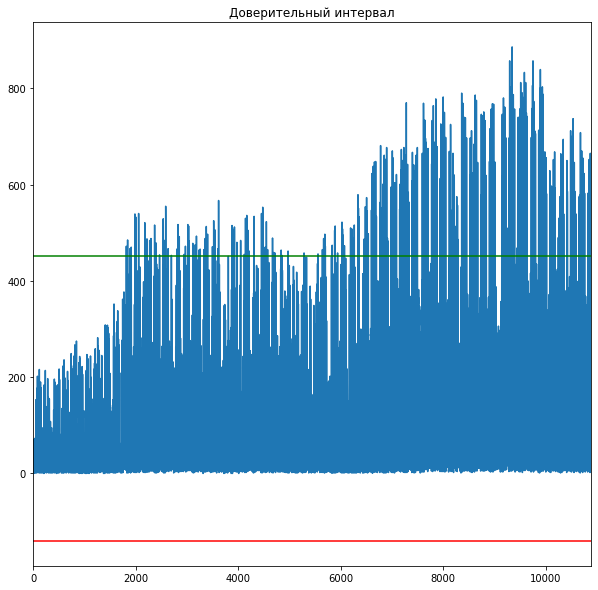

In [33]:
def my_norm_confidence(df=df, column = "diff_price", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval
# самая большая дисперсия у registered, для которого std = 151.039033.
confidence = my_norm_confidence(column = 'registered')
print(confidence)
df.registered.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")



### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [48]:
# anomaly_table = pd.DataFrame()
# for i in df:
#     confidence = my_norm_confidence(column = i)
#     anomaly_table[i] = np.where(df[i] > confidence[1], 1,0)
# #df["anomaly_big"] = np.where(df.diff_price > confidence[1], 1,0)
# anomaly_table.head()
# df[df.registered == 1].registered.count()

def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    anomaly = df[(df[column] >= upper_level)]
    return anomaly,upper_level
for i in df:
    anomaly = find_anomaly(df=df, column = i)
    print(f'количество значений, выходящих за три сигмы для {i} равно: ',len(anomaly[0]))
    print('--------------------------')
    


количество значений, выходящих за три сигмы для season равно:  0
--------------------------
количество значений, выходящих за три сигмы для holiday равно:  311
--------------------------
количество значений, выходящих за три сигмы для workingday равно:  0
--------------------------
количество значений, выходящих за три сигмы для weather равно:  1
--------------------------
количество значений, выходящих за три сигмы для temp равно:  0
--------------------------
количество значений, выходящих за три сигмы для atemp равно:  0
--------------------------
количество значений, выходящих за три сигмы для humidity равно:  0
--------------------------
количество значений, выходящих за три сигмы для windspeed равно:  67
--------------------------
количество значений, выходящих за три сигмы для casual равно:  292
--------------------------
количество значений, выходящих за три сигмы для registered равно:  235
--------------------------
количество значений, выходящих за три сигмы для count равно: 

Больше всего аномалий у holiday. Но это скорее всего какая-то ошибка.
А также у casual и registered по 292 и 232 аномалий соответственно.

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

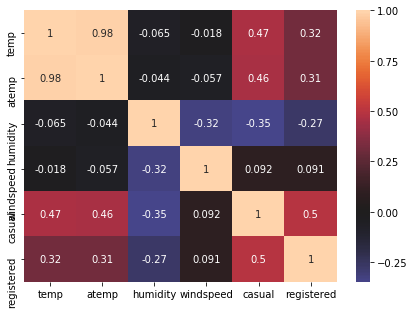

In [50]:

corr_m = df[base_metrics].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


Исходя из корреляционной матрицы и heatmap по метрикам, заметной и сильной связи ни у кого нет. Существуют умеренные связи между температурой и casual, registrated. И такие же взаимосвязи между humidity, humidity, casual.